In [1]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import warnings
import pickle

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/All Classification/Final_data.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Label,Time,Acceleration_frontal,Acceleration_vertical,Acceleration_lateral,Antenna,RSSI,Phase,Frequency
0,1,-1.379115,-1.092959,1.582170,0.168314,-1.278914,-1.013009,-0.335462,0.940647
1,1,-1.376702,-1.092959,1.582170,0.168314,-1.278914,-0.915801,0.723853,-0.548252
2,1,-1.371875,-0.658239,1.363004,0.457582,-1.278914,-1.013009,-0.057814,0.642867
3,1,-1.370668,-0.658239,1.363004,0.457582,-1.278914,-0.915801,-0.513305,-0.846032
4,1,-1.367049,-0.919076,1.472611,0.264737,-1.278914,-1.013009,1.253166,-1.441592


In [4]:
X = df.drop(['Label'],axis=1)
y = df['Label']

In [5]:
train, val_train, test, val_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Logistic Regression**

**Here we use solver is 'lbfgs' and penalty is 'l2'. The reason behind that because as compared to other solver 'lbfgs' gives highest accuracy.**

In [7]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print('Traning Score LR  : {}'.format(LR.score(X_train,y_train)))
print('Testing Score LR  : {}'.format(LR.score(X_test,y_test)))

Traning Score LR  : 0.9247479767144683
Testing Score LR  : 0.9249281226706421


In [8]:
LR_pred = LR.predict(X_test)
LR_prob = LR.predict_proba(X_test)
print('ROC AUC Score : {}'.format(roc_auc_score(y_test, LR_prob, multi_class='ovo', average='weighted')))
print(classification_report(y_test,LR_pred))
print(confusion_matrix(y_test,LR_pred))

ROC AUC Score : 0.9449959900469437
              precision    recall  f1-score   support

           1       0.77      0.96      0.85      4093
           2       0.71      0.29      0.41      1216
           3       1.00      1.00      1.00     12910
           4       0.98      0.36      0.53       563

    accuracy                           0.92     18782
   macro avg       0.86      0.65      0.70     18782
weighted avg       0.93      0.92      0.91     18782

[[ 3920   115    58     0]
 [  860   351     0     5]
 [   11     3 12896     0]
 [  333    22     3   205]]


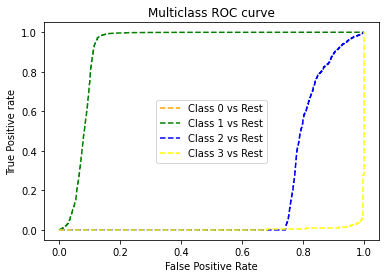

In [9]:
fpr = {}
tpr = {}
thresh ={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, LR_prob[:,i], pos_label=i)
    
# plotting ROC AUC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

**Support Vector Classifier**

In [10]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
print('Traning Score SVC  : {}'.format(svc.score(X_train,y_train)))
print('Testing Score SVC  : {}'.format(svc.score(X_test,y_test)))

Traning Score SVC  : 0.9743717165980406
Testing Score SVC  : 0.9728463422425727


In [11]:
svc_pred = svc.predict(X_test)
svc_prob = svc.predict_proba(X_test)
print('ROC AUC Score : {}'.format(roc_auc_score(y_test, svc_prob, multi_class='ovo', average='weighted')))
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))

ROC AUC Score : 0.9882502253226745
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      4093
           2       0.91      0.95      0.93      1216
           3       1.00      1.00      1.00     12910
           4       0.94      0.45      0.61       563

    accuracy                           0.97     18782
   macro avg       0.94      0.84      0.87     18782
weighted avg       0.97      0.97      0.97     18782

[[ 3964    80    40     9]
 [   52  1158     0     6]
 [   15     0 12895     0]
 [  273    32     3   255]]


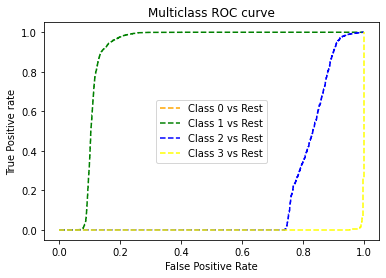

In [12]:
fpr = {}
tpr = {}
thresh ={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, svc_prob[:,i], pos_label=i)
    
# plotting ROC AUC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

**Support Vector Classifier Hyperparameter**

In [13]:
# param ={"kernel":['linear', 'poly', 'rbf', 'sigmoid' ],
#         'gamma' :['scale', 'auto'],
#         'decision_function_shape':['ovo', 'ovr']
#        }

# svm_grid = GridSearchCV(svc, param_grid=param, verbose=1)
# svm_grid.fit(X_train,y_train)

In [14]:
# svm_grid.best_params_

In [15]:
# svc2 = SVC(kernel='rbf', gamma='scale', decision_function_shape='ovo',probability=True)
# svc2.fit(X_train,y_train)
# print('Traning Score SVC  : {}'.format(svc2.score(X_train,y_train)))
# print('Testing Score SVC  : {}'.format(svc2.score(X_test,y_test)))

In [16]:
# svc2_pred = svc2.predict(X_test)
# svc2_prob = svc2.predict_proba(X_test)
# print('ROC AUC Score : {}'.format(roc_auc_score(y_test, svc2_prob, multi_class='ovo', average='weighted')))
# print(classification_report(y_test,svc2_pred))
# print(confusion_matrix(y_test,svc2_pred))

**K Neighnors Classifier**

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print('Traning Score KNN  : {}'.format(knn.score(X_train,y_train)))
print('Testing Score KNN  : {}'.format(knn.score(X_test,y_test)))

Traning Score KNN  : 0.9857837569217663
Testing Score KNN  : 0.981098924502183


In [18]:
knn_pred = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)
print('ROC AUC Score : {}'.format(roc_auc_score(y_test, knn_prob, multi_class='ovo', average='weighted')))
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

ROC AUC Score : 0.9772772739171202
              precision    recall  f1-score   support

           1       0.96      0.97      0.96      4093
           2       0.95      0.97      0.96      1216
           3       0.99      1.00      1.00     12910
           4       0.91      0.70      0.79       563

    accuracy                           0.98     18782
   macro avg       0.95      0.91      0.93     18782
weighted avg       0.98      0.98      0.98     18782

[[ 3951    43    66    33]
 [   29  1180     0     7]
 [    8     2 12900     0]
 [  141    22     4   396]]


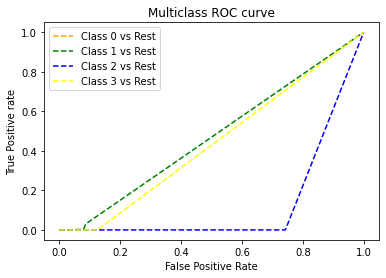

In [19]:
fpr = {}
tpr = {}
thresh ={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_prob[:,i], pos_label=i)
    
# plotting ROC AUC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

**K Neighbour Classifier Hyperparamter**

In [20]:
# param  = { 'n_neighbors':[3,5,7,9],
#           'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#           'leaf_size' : [10 , 15 , 20],
#           'p' : [1,2],
#           'weights' : ['uniform', 'distance']
#     }

# knn_grid = GridSearchCV(estimator=knn, param_grid=param, verbose=1)
# knn_grid.fit(X_train,y_train)

In [21]:
# knn_grid.best_params_

In [22]:
# knn2 = KNeighborsClassifier(n_neighnors=, algorithm=, leaf_size=, p=, weights=)
# knn2.fit(X_train,y_train)
# print('Traning Score KNN  : {}'.format(knn2.score(X_train,y_train)))
# print('Testing Score KNN  : {}'.format(knn2.score(X_test,y_test)))

In [23]:
# knn_pred = knn2.predict(X_test)
# knn_prob = knn2.predict_proba(X_test)
# print('ROC AUC Score : {}'.format(roc_auc_score(y_test, knn2_prob, multi_class='ovo', average='weighted')))
# print(classification_report(y_test,knn2_pred))
# print(confusion_matrix(y_test,knn2_pred))

**Decesion Tree Classifier**

In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print('Traning Score DTC  : {}'.format(dtc.score(X_train,y_train)))
print('Testing Score DTC  : {}'.format(dtc.score(X_test,y_test)))

Traning Score DTC  : 1.0
Testing Score DTC  : 0.9840272601426898


In [25]:
dtc_pred = dtc.predict(X_test)
dtc_prob = dtc.predict_proba(X_test)
print('ROC AUC Score : {}'.format(roc_auc_score(y_test, dtc_prob, multi_class='ovo', average='weighted')))
print(classification_report(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))

ROC AUC Score : 0.9703197562945579
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      4093
           2       0.96      0.96      0.96      1216
           3       1.00      1.00      1.00     12910
           4       0.82      0.81      0.82       563

    accuracy                           0.98     18782
   macro avg       0.94      0.94      0.94     18782
weighted avg       0.98      0.98      0.98     18782

[[ 3970    32    11    80]
 [   26  1173     0    17]
 [   26     0 12884     0]
 [   83    20     5   455]]


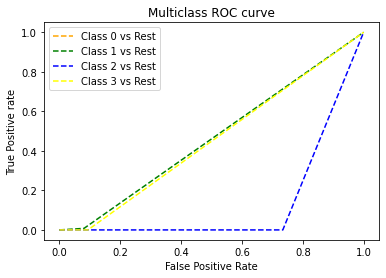

In [26]:
fpr = {}
tpr = {}
thresh ={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, dtc_prob[:,i], pos_label=i)
    
# plotting ROC AUC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

**Decesion Tree Classifier Hyperparameter**

In [27]:
param = { 'criterion':['gini', 'entropy'],
          'splitter':['best', 'random'],
          'max_depth':range(1,5),
          'min_samples_leaf':range(1,5),
          'min_samples_split':range(1,5)
}

dtc_grid = GridSearchCV(estimator=dtc, param_grid=param, verbose=1)
dtc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed:   46.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [28]:
dtc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [29]:
dtc2 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter='best')
dtc2.fit(X_train,y_train)
print('Traning Score KNN  : {}'.format(dtc2.score(X_train,y_train)))
print('Testing Score KNN  : {}'.format(dtc2.score(X_test,y_test)))

Traning Score KNN  : 0.93841402811302
Testing Score KNN  : 0.9379192844212544


In [30]:
dtc2_pred = dtc2.predict(X_test)
dtc2_prob = dtc2.predict_proba(X_test)
print('ROC AUC Score : {}'.format(roc_auc_score(y_test, dtc2_prob, multi_class='ovo', average='weighted')))
print(classification_report(y_test,dtc2_pred))
print(confusion_matrix(y_test,dtc2_pred))

ROC AUC Score : 0.9594962951357474
              precision    recall  f1-score   support

           1       0.80      0.96      0.87      4093
           2       0.78      0.48      0.60      1216
           3       1.00      1.00      1.00     12910
           4       0.98      0.42      0.58       563

    accuracy                           0.94     18782
   macro avg       0.89      0.71      0.76     18782
weighted avg       0.94      0.94      0.93     18782

[[ 3909   153    31     0]
 [  625   587     0     4]
 [   24     0 12886     0]
 [  313    13     3   234]]


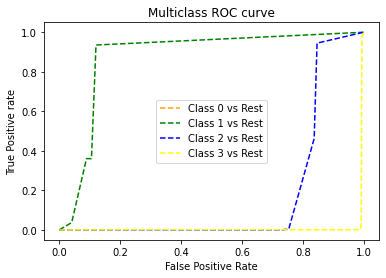

In [31]:
fpr = {}
tpr = {}
thresh ={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, dtc2_prob[:,i], pos_label=i)
    
# plotting ROC AUC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

**Bagging Classifier**

In [32]:
bagg = BaggingClassifier()
bagg.fit(X_train,y_train)
print('Traning Score Bagg  : {}'.format(bagg.score(X_train,y_train)))
print('Testing Score Bagg  : {}'.format(bagg.score(X_test,y_test)))

Traning Score Bagg  : 0.9987931279284396
Testing Score Bagg  : 0.9882334149717815


In [33]:
bagg_pred = bagg.predict(X_test)
bagg_prob = bagg.predict_proba(X_test)
print('ROC AUC Score : {}'.format(roc_auc_score(y_test, bagg_prob, multi_class='ovo', average='weighted')))
print(classification_report(y_test,bagg_pred))
print(confusion_matrix(y_test,bagg_pred))

ROC AUC Score : 0.9919383406742087
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      4093
           2       0.97      0.98      0.97      1216
           3       1.00      1.00      1.00     12910
           4       0.92      0.79      0.85       563

    accuracy                           0.99     18782
   macro avg       0.96      0.94      0.95     18782
weighted avg       0.99      0.99      0.99     18782

[[ 4041    20     7    25]
 [   17  1188     0    11]
 [   21     0 12889     0]
 [  100    19     1   443]]


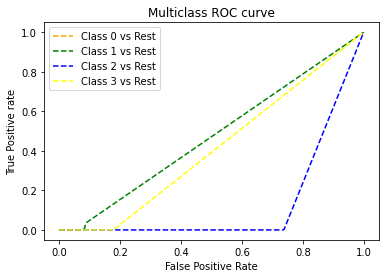

In [34]:
fpr = {}
tpr = {}
thresh ={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, bagg_prob[:,i], pos_label=i)
    
# plotting ROC AUC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

**Bagging Classifier Hyperparameter**

In [35]:
param = { 'base_estimator' : [DecisionTreeClassifier(), KNeighborsClassifier(), SVC()],
          'n_estimators' : [5,10,15] 
}

bagg_grid = GridSearchCV(estimator=bagg, param_grid=param, verbose=1)
bagg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 10.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_...
                                                                 weights='uniform'),
                                            SVC(C=1.0, break_ties=False,
                                                cache_size=200,
                                                class_weight=None, coef0=0.0,
                  

In [36]:
bagg_grid.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_estimators': 15}

In [37]:
bagg2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=2,splitter='best'),n_estimators=10)
bagg2.fit(X_train,y_train)
print('Traning Score Bagg  : {}'.format(bagg2.score(X_train,y_train)))
print('Testing Score Bagg  : {}'.format(bagg2.score(X_test,y_test)))

Traning Score Bagg  : 0.9989351128780349
Testing Score Bagg  : 0.9886593547013097


In [38]:
bagg2_pred = bagg2.predict(X_test)
bagg2_prob = bagg2.predict_proba(X_test)
print('ROC AUC Score : {}'.format(roc_auc_score(y_test, bagg2_prob, multi_class='ovo', average='weighted')))
print(classification_report(y_test,bagg2_pred))
print(confusion_matrix(y_test,bagg2_pred))

ROC AUC Score : 0.9911897308546317
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      4093
           2       0.97      0.98      0.98      1216
           3       1.00      1.00      1.00     12910
           4       0.92      0.80      0.86       563

    accuracy                           0.99     18782
   macro avg       0.96      0.94      0.95     18782
weighted avg       0.99      0.99      0.99     18782

[[ 4036    20     7    30]
 [   14  1191     0    11]
 [   21     0 12889     0]
 [   93    16     1   453]]


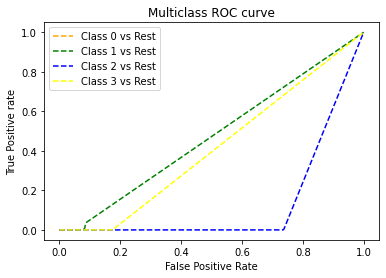

In [39]:
fpr = {}
tpr = {}
thresh ={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, bagg2_prob[:,i], pos_label=i)
    
# plotting ROC AUC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

**Stacking**

In [40]:
dtc_stack = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter='best')
dtc_stack.fit(X_train,y_train)
print('Testing Score Stack DTC : {}'.format(dtc_stack.score(X_test,y_test)))

Testing Score Stack DTC : 0.9379192844212544


In [41]:
svc_stack = SVC(probability=True)
svc_stack.fit(X_train,y_train)
print('Testing Score Stack SVC  : {}'.format(svc_stack.score(X_test,y_test)))

Testing Score Stack SVC  : 0.9728463422425727


In [42]:
pred_dtc_stack = dtc_stack.predict(val_train)
pred_svc_stack = svc_stack.predict(val_train)

In [43]:
input_stack = np.column_stack((pred_dtc_stack,pred_svc_stack))

In [44]:
output_stack = val_test

In [45]:
bagg_stack = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=2,splitter='best'),n_estimators=10)
bagg_stack.fit(input_stack,output_stack)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [46]:
dtc_stack_output = dtc_stack.predict(X_test)
svc_stack_output = svc_stack.predict(X_test)

In [47]:
output_stack1 = np.column_stack ((dtc_stack_output,svc_stack_output))

In [48]:
bagg_stack.predict(output_stack1)

array([3, 3, 1, ..., 1, 3, 3])

In [49]:
bagg_stack.score(output_stack1, y_test)

0.9729528271749548

In [50]:
bagg_stack_prob = bagg_stack.predict_proba(output_stack1)
print('ROC AUC Score : {}'.format(roc_auc_score(y_test, bagg_stack_prob, multi_class='ovo', average='weighted')))
print(classification_report(y_test,bagg_stack.predict(output_stack1)))
print(confusion_matrix(y_test,bagg_stack.predict(output_stack1)))

ROC AUC Score : 0.9715587714177518
              precision    recall  f1-score   support

           1       0.92      0.97      0.94      4093
           2       0.91      0.95      0.93      1216
           3       1.00      1.00      1.00     12910
           4       0.94      0.45      0.61       563

    accuracy                           0.97     18782
   macro avg       0.94      0.84      0.87     18782
weighted avg       0.97      0.97      0.97     18782

[[ 3974    80    30     9]
 [   52  1158     0     6]
 [   24     0 12886     0]
 [  272    32     3   256]]


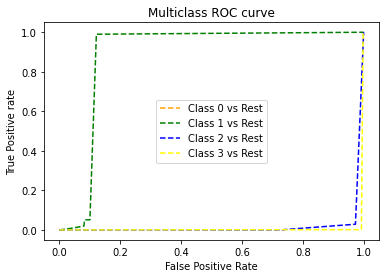

In [51]:
fpr = {}
tpr = {}
thresh ={}
n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, bagg_stack_prob[:,i], pos_label=i)
    
# plotting ROC AUC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [52]:
file = 'bagging.pkl'

pickle.dump(bagg2,open(file,'wb'))